# Rozdział 4 - Uczenie modeli

## 1. Regresja liniowa

#### 1.1 Równanie normalne

<b>1.1.1 Implementacja własna</b>

Generowanie zbioru danych

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Wyznaczanie parametrów

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.96871851],
       [3.03985996]])

Wyznaczanie prognozy

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.96871851],
       [10.04843843]])

Wykres prognoz

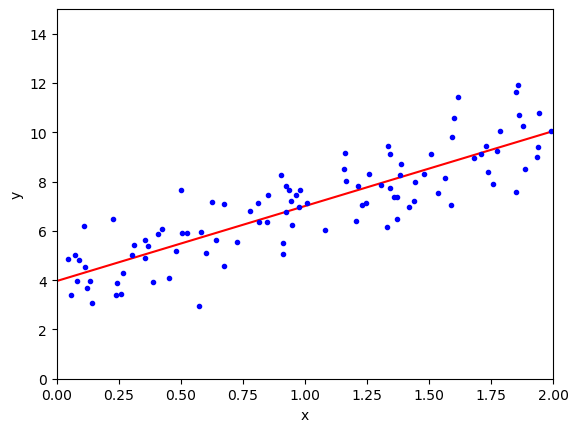

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<b>1.1.2 Implementacja w Scikit-Learn</b>

###### 1.1.2.1 Wersja standardowa

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.96871851]), array([[3.03985996]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.96871851],
       [10.04843843]])

###### 1.1.2.2 Bezpośrednie wywołanie funkcji działającej na podstawie "najmniejszych kwadratów"

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96871851],
       [3.03985996]])

###### 1.1.2.3 Macierz pseudoodwrotna

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.96871851],
       [3.03985996]])

#### 1.2 Gradient prosty (gradient descent)

<b>1.2.1 Wsadowy gradient prosty</b>

In [11]:
eta = 0.1
n_iterations = 1000
m = X_b.shape[0]

theta = np.random.rand(2, 1) # Losowa inicjalizacja

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.96871851],
       [3.03985996]])

<b>1.2.2 Stochastyczny spadek wzdłuż gradientu SGD</b>

###### 1.2.2.1 Implementacja własna

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # Hiperparametry harmonogramu uczenia

def learning_schedule(t):
    return t0/(t1 + t)

np.random.seed(42)
theta = np.random.rand(2, 1) # Losowa inicjalizacja

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[3.91498583],
       [3.02154899]])

###### 1.2.2.2 Implementacja w Scikit-Learn

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.9860908]), array([3.08663595]))

<b>1.2.3 Schodzenie po gradiencie z minigrupami</b>

In [17]:
n_epochs = 50
minibatch_size = 20
t0, t1 = 200, 1000
t = 0

np.random.seed(42)
theta = np.random.randn(2,1)  # Losowa inicjalizacja

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [18]:
theta

array([[4.1247381 ],
       [3.19489779]])

## 2. Regresja wielomianowa

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X[0]

array([2.38942838])

In [22]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

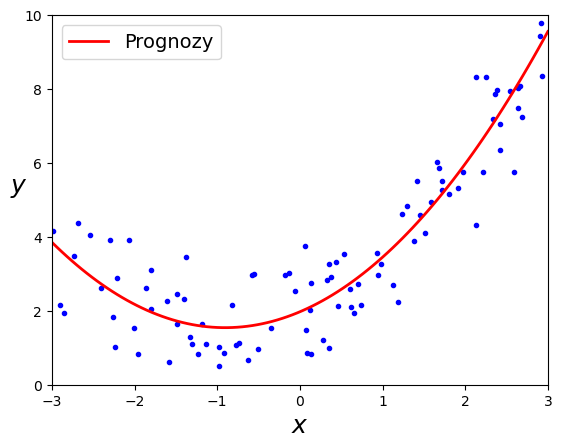

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prognozy")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 3. Krzywe uczenia

#### 3.1 Model liniowy

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=420)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Zestaw uczący")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Zestaw walidacyjny")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Rozmiar zestawu uczącego", fontsize=14)
    plt.ylabel("Błąd RMSE", fontsize=14)
    plt.axis([0, 80, 0, 3])

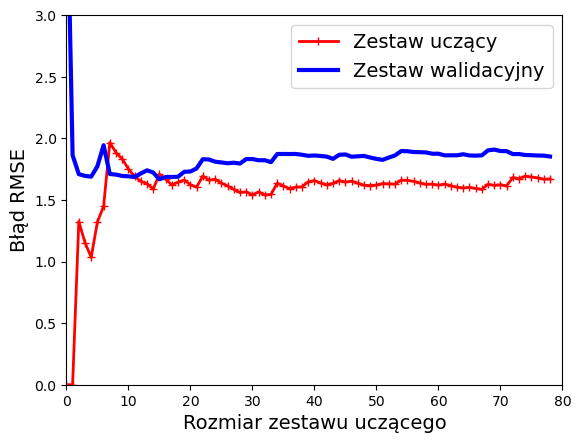

In [26]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

#### 3.2 Model wielomianowy

In [27]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

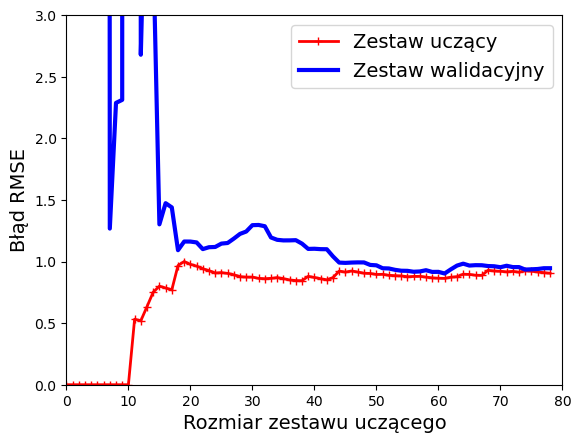

In [28]:
plot_learning_curves(polynomial_regression, X, y)

## 4. Regularyzowane modele liniowe

#### 4.1 Regresja grzbietowa (Tichonowa)

<b>4.1.1 Jawny wzór regresji grzbietowej</b>

In [29]:
from sklearn.linear_model import  Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

<b>4.1.2 Stochastyczny spadek wzdłuż gradientu</b>

In [30]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.11430755])

#### 4.2 Regresja metodą LASSO

Sposób I

In [31]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09481859])

Sposób II

In [32]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.13753071])

#### 4.3 Metoda elastycznej siatki

Jest to połączenie metody grzbietowej i metody LASSO. O tym, która składowa ma większe znaczenie decyduje parametr ${r}$. Jeśli ${r=0}$, wówczas mamy do czynienia z regresją grzbietową, natomiast gdy ${r=1}$ to korzystamy z metody LASSO.

Metoda elastycznej siatki jest zawsze preferowana. Jednakże jeśli podejrzewamy, że potrzebnych będzie tylko część cech powinniśmy postawić na metodę LASSO, bądź zwiększyć znaczenie tego członu.

In [33]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio = r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09373477])

#### 4.4 Wczesne zatrzymywanie

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # kontynuuje działanie w miejscu, w którym zostało przerwane
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

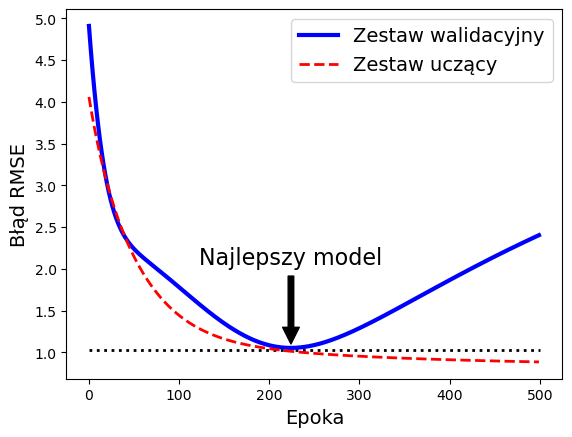

In [36]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Najlepszy model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
             )

best_val_rmse -= 0.03  # w celu poprawienia wyglądu wykresu
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Zestaw walidacyjny")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Zestaw uczący")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoka", fontsize=14)
plt.ylabel("Błąd RMSE", fontsize=14)
plt.show()

In [37]:
best_epoch, best_model

(224,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

## 5. Regresja logistyczna

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [39]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [40]:
X = iris["data"][:, 3:]  # szerokość płatka
y = (iris["target"] == 2).astype(np.int32)  # 1 jeśli Iris virginica, w przeciwnym razie 0

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

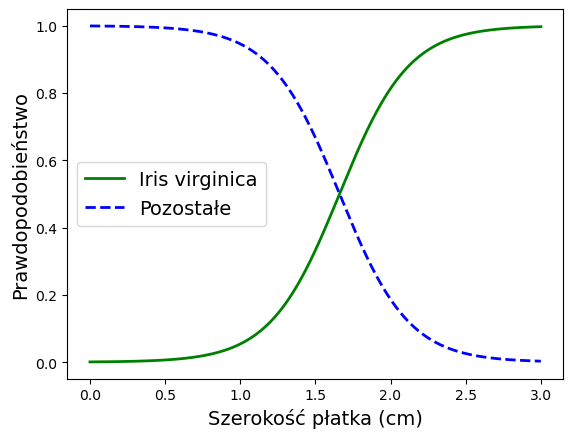

In [42]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Pozostałe")
plt.xlabel("Szerokość płatka (cm)", fontsize=14)
plt.ylabel("Prawdopodobieństwo", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

In [43]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int32)

## 6. Regresja softmax

In [44]:
X = iris["data"][:, (2, 3)]  # długość płatka, szerokość płatka
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [45]:
softmax_reg.predict([[5, 2]])

array([2])

In [46]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

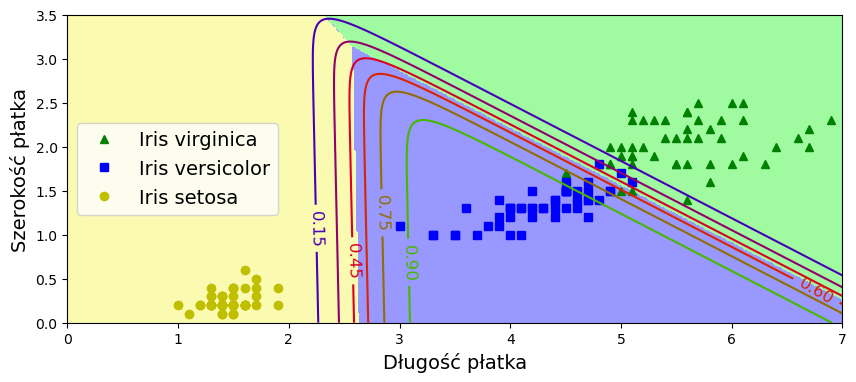

In [56]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Długość płatka", fontsize=14)
plt.ylabel("Szerokość płatka", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [61]:
y_proba

array([[9.99996239e-01, 3.76140758e-06, 6.80030712e-20],
       [9.99995941e-01, 4.05882856e-06, 7.85729317e-20],
       [9.99995620e-01, 4.37976703e-06, 9.07856856e-20],
       ...,
       [7.73770362e-23, 1.03687990e-11, 1.00000000e+00],
       [6.69680312e-23, 9.68354416e-12, 1.00000000e+00],
       [5.79592787e-23, 9.04357657e-12, 1.00000000e+00]])